In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np 
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.linalg import svd
from scipy.sparse.linalg import svds

## Graphe équilibré

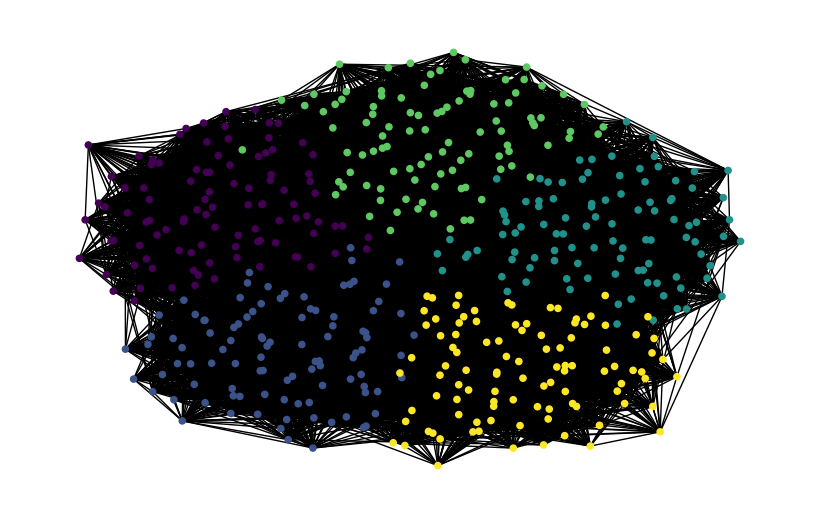

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


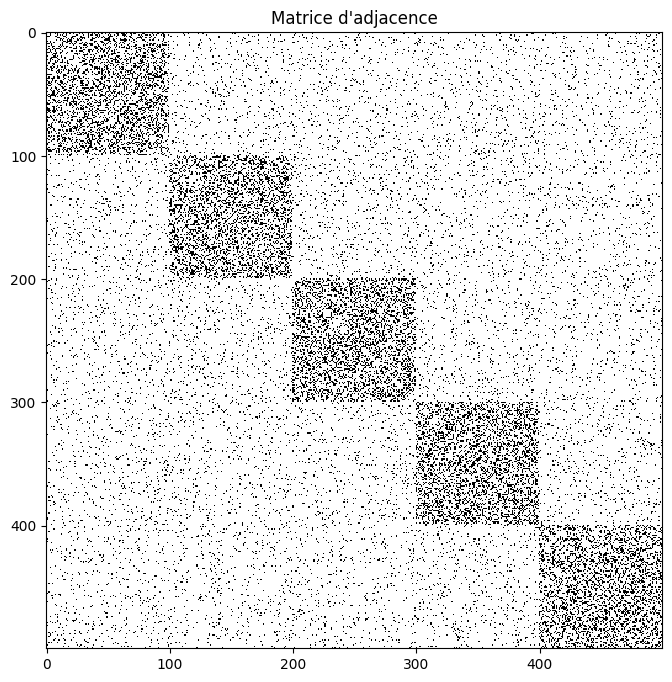

In [19]:
# Parameters
true_k =5# True number of communities
sizes = [100] * true_k  # Sizes of each community
p = 0.3
q=0.05
p_matrix = np.full((true_k, true_k), q)  # Inter-block probabilities
np.fill_diagonal(p_matrix, p)  # Intra-block probabilities
G = nx.stochastic_block_model(sizes, p_matrix, seed=42)
pos = nx.spring_layout(G)  # Disposition des nœuds
plt.figure(figsize=(8, 5))
nx.draw( G, pos, with_labels=False, node_size=20, node_color=[d['block'] for _, d in G.nodes(data=True)])
plt.show()
adj_matrix = nx.adjacency_matrix(G)
A = adj_matrix.todense()
print(A)
plt.figure(figsize=(8, 8))
plt.imshow(A, cmap="Greys", interpolation="none")
plt.title("Matrice d'adjacence")
plt.show()

### Méthode spectrale (matrice laplacienne)

/var/folders/gp/mjd24qcx5yz_0yn2p3wsmvmh0000gn/T/ipykernel_1667/2998473526.py:3: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eigenvalues, eigenvectors = eigsh(L, k= A.shape[0], which='SM')


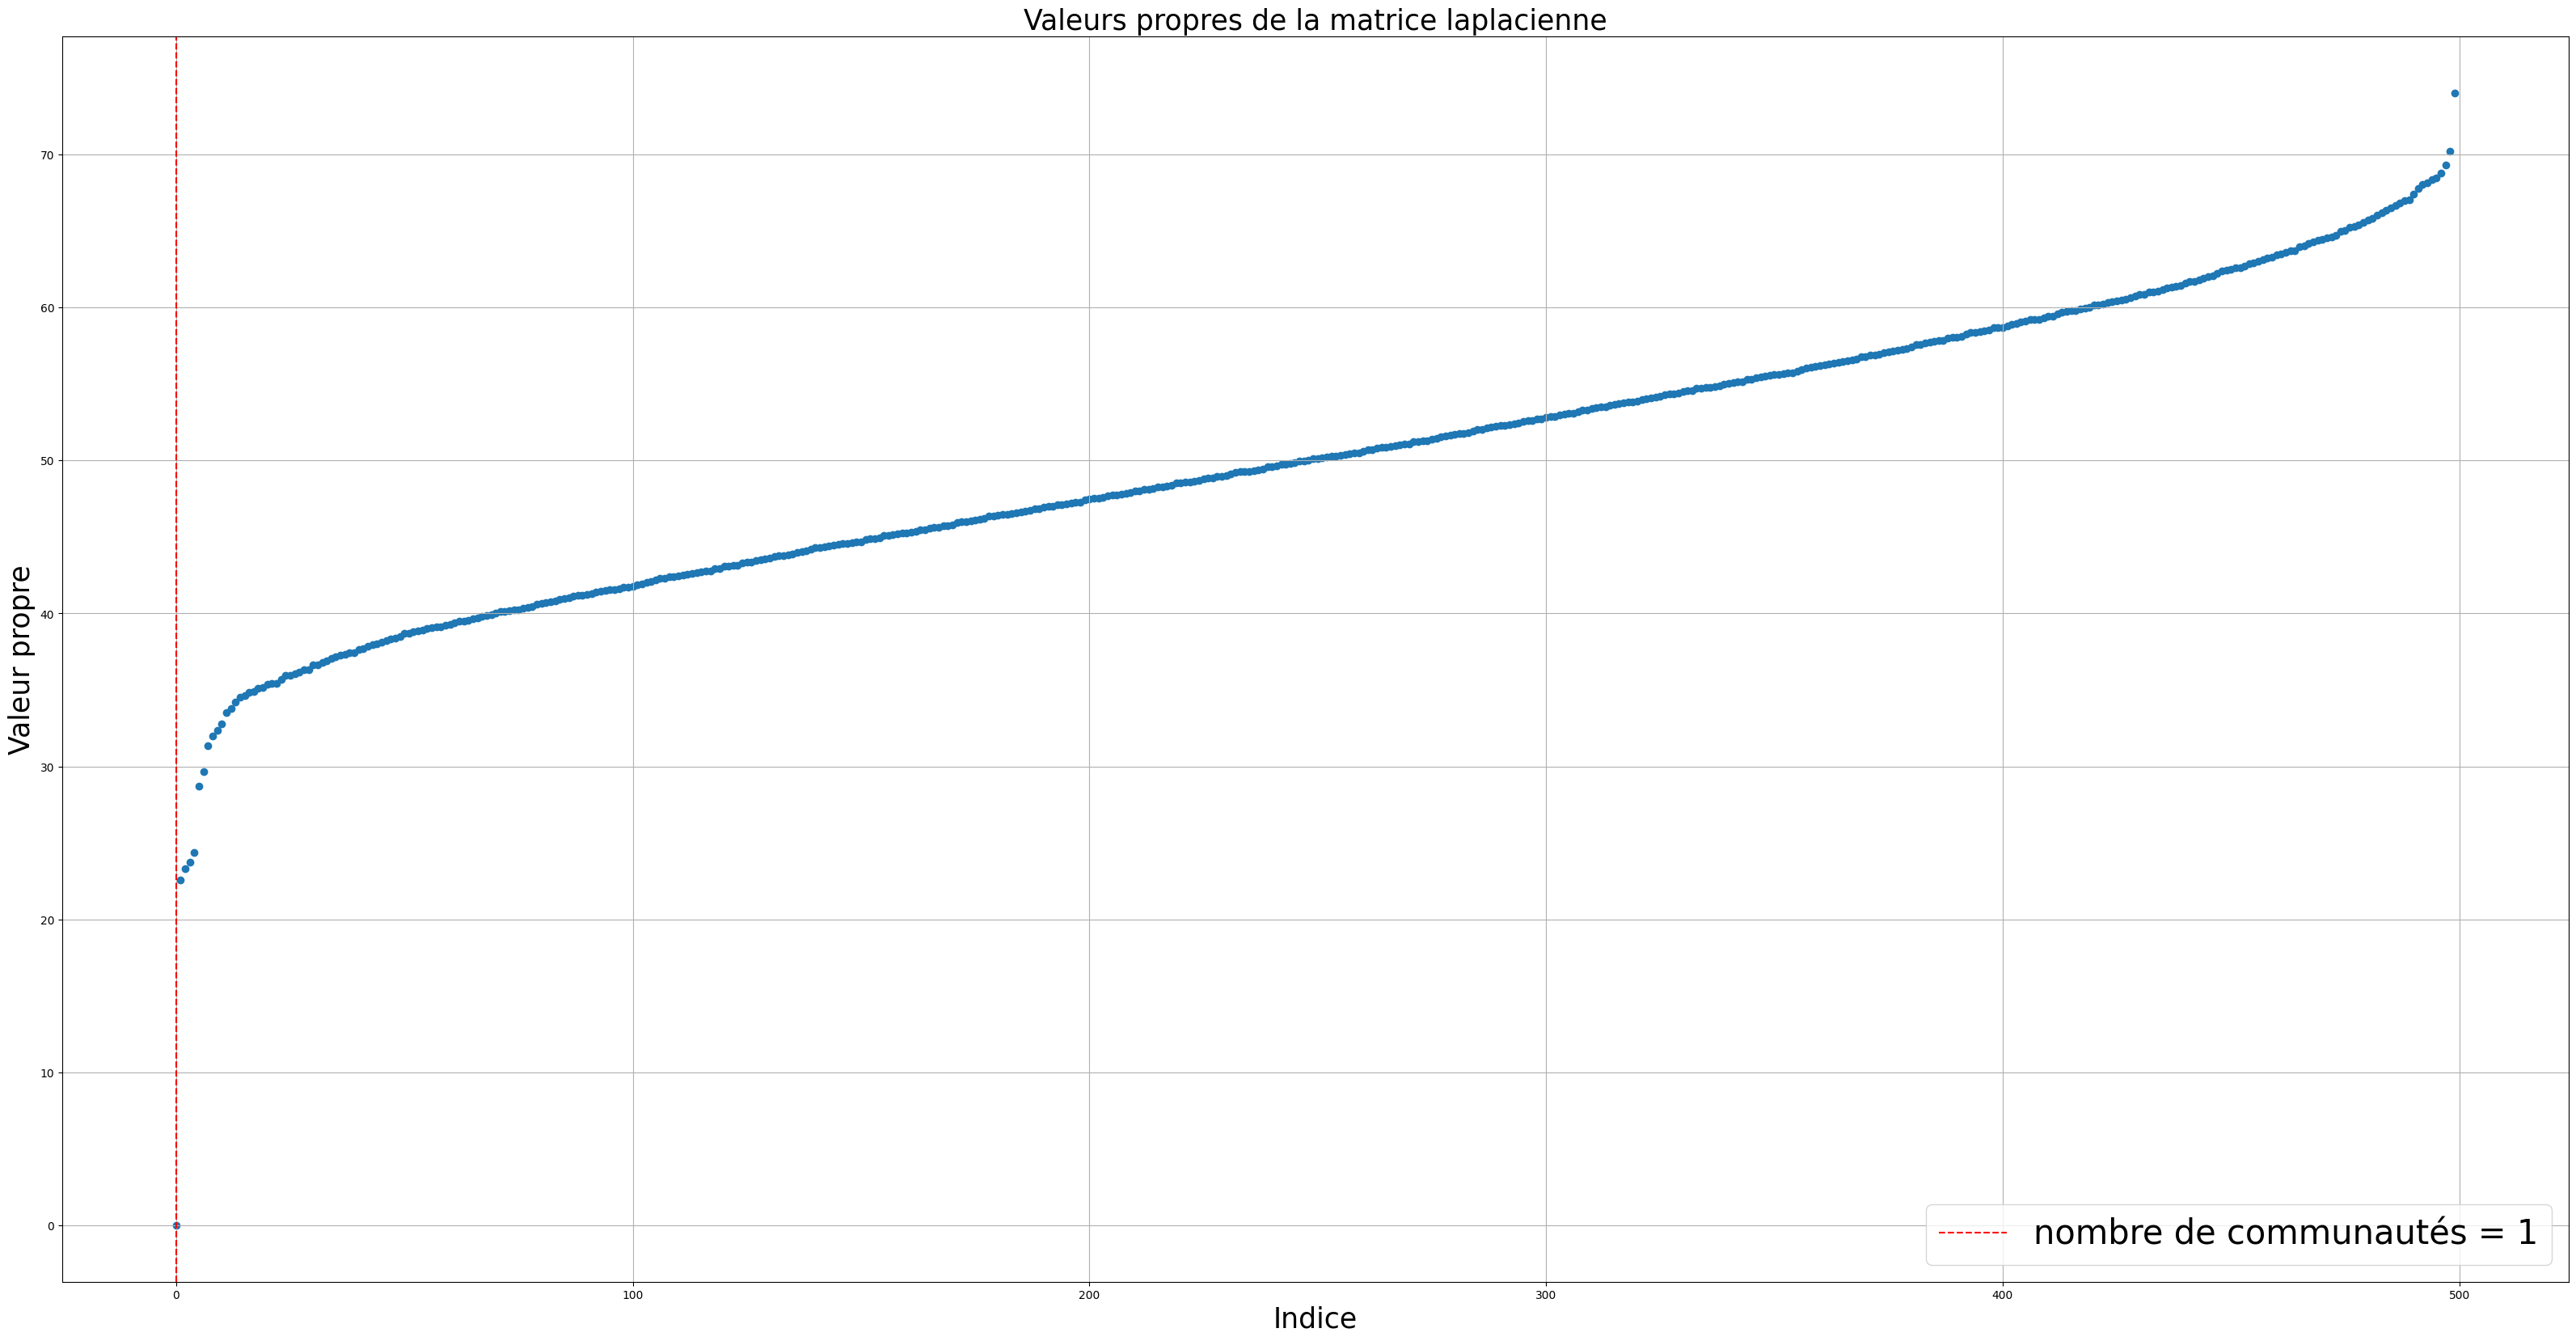

In [16]:
D=np.diag(np.sum(A,axis=1)) #matrice de degrès
L = D - A #matrice laplacienne 
eigenvalues, eigenvectors = eigsh(L, k= A.shape[0], which='SM')
eigenvalues = np.sort(eigenvalues)
spectral_gaps = np.diff(eigenvalues)
largest_gap_index = np.argmax(spectral_gaps)
k = largest_gap_index + 1
plt.figure(figsize=(40, 20))
plt.scatter(range(len(eigenvalues)),eigenvalues , marker='o')
plt.axvline(largest_gap_index, color='r', linestyle='--', label=f'nombre de communautés = {k}')
plt.title("Valeurs propres de la matrice laplacienne",fontsize=25)
plt.xlabel("Indice", fontsize=25)
plt.ylabel("Valeur propre", fontsize=25)
plt.legend(fontsize=30)
plt.grid()
plt.show()

### Méthode spectrale (valeurs singulières matrice d'adjacence)

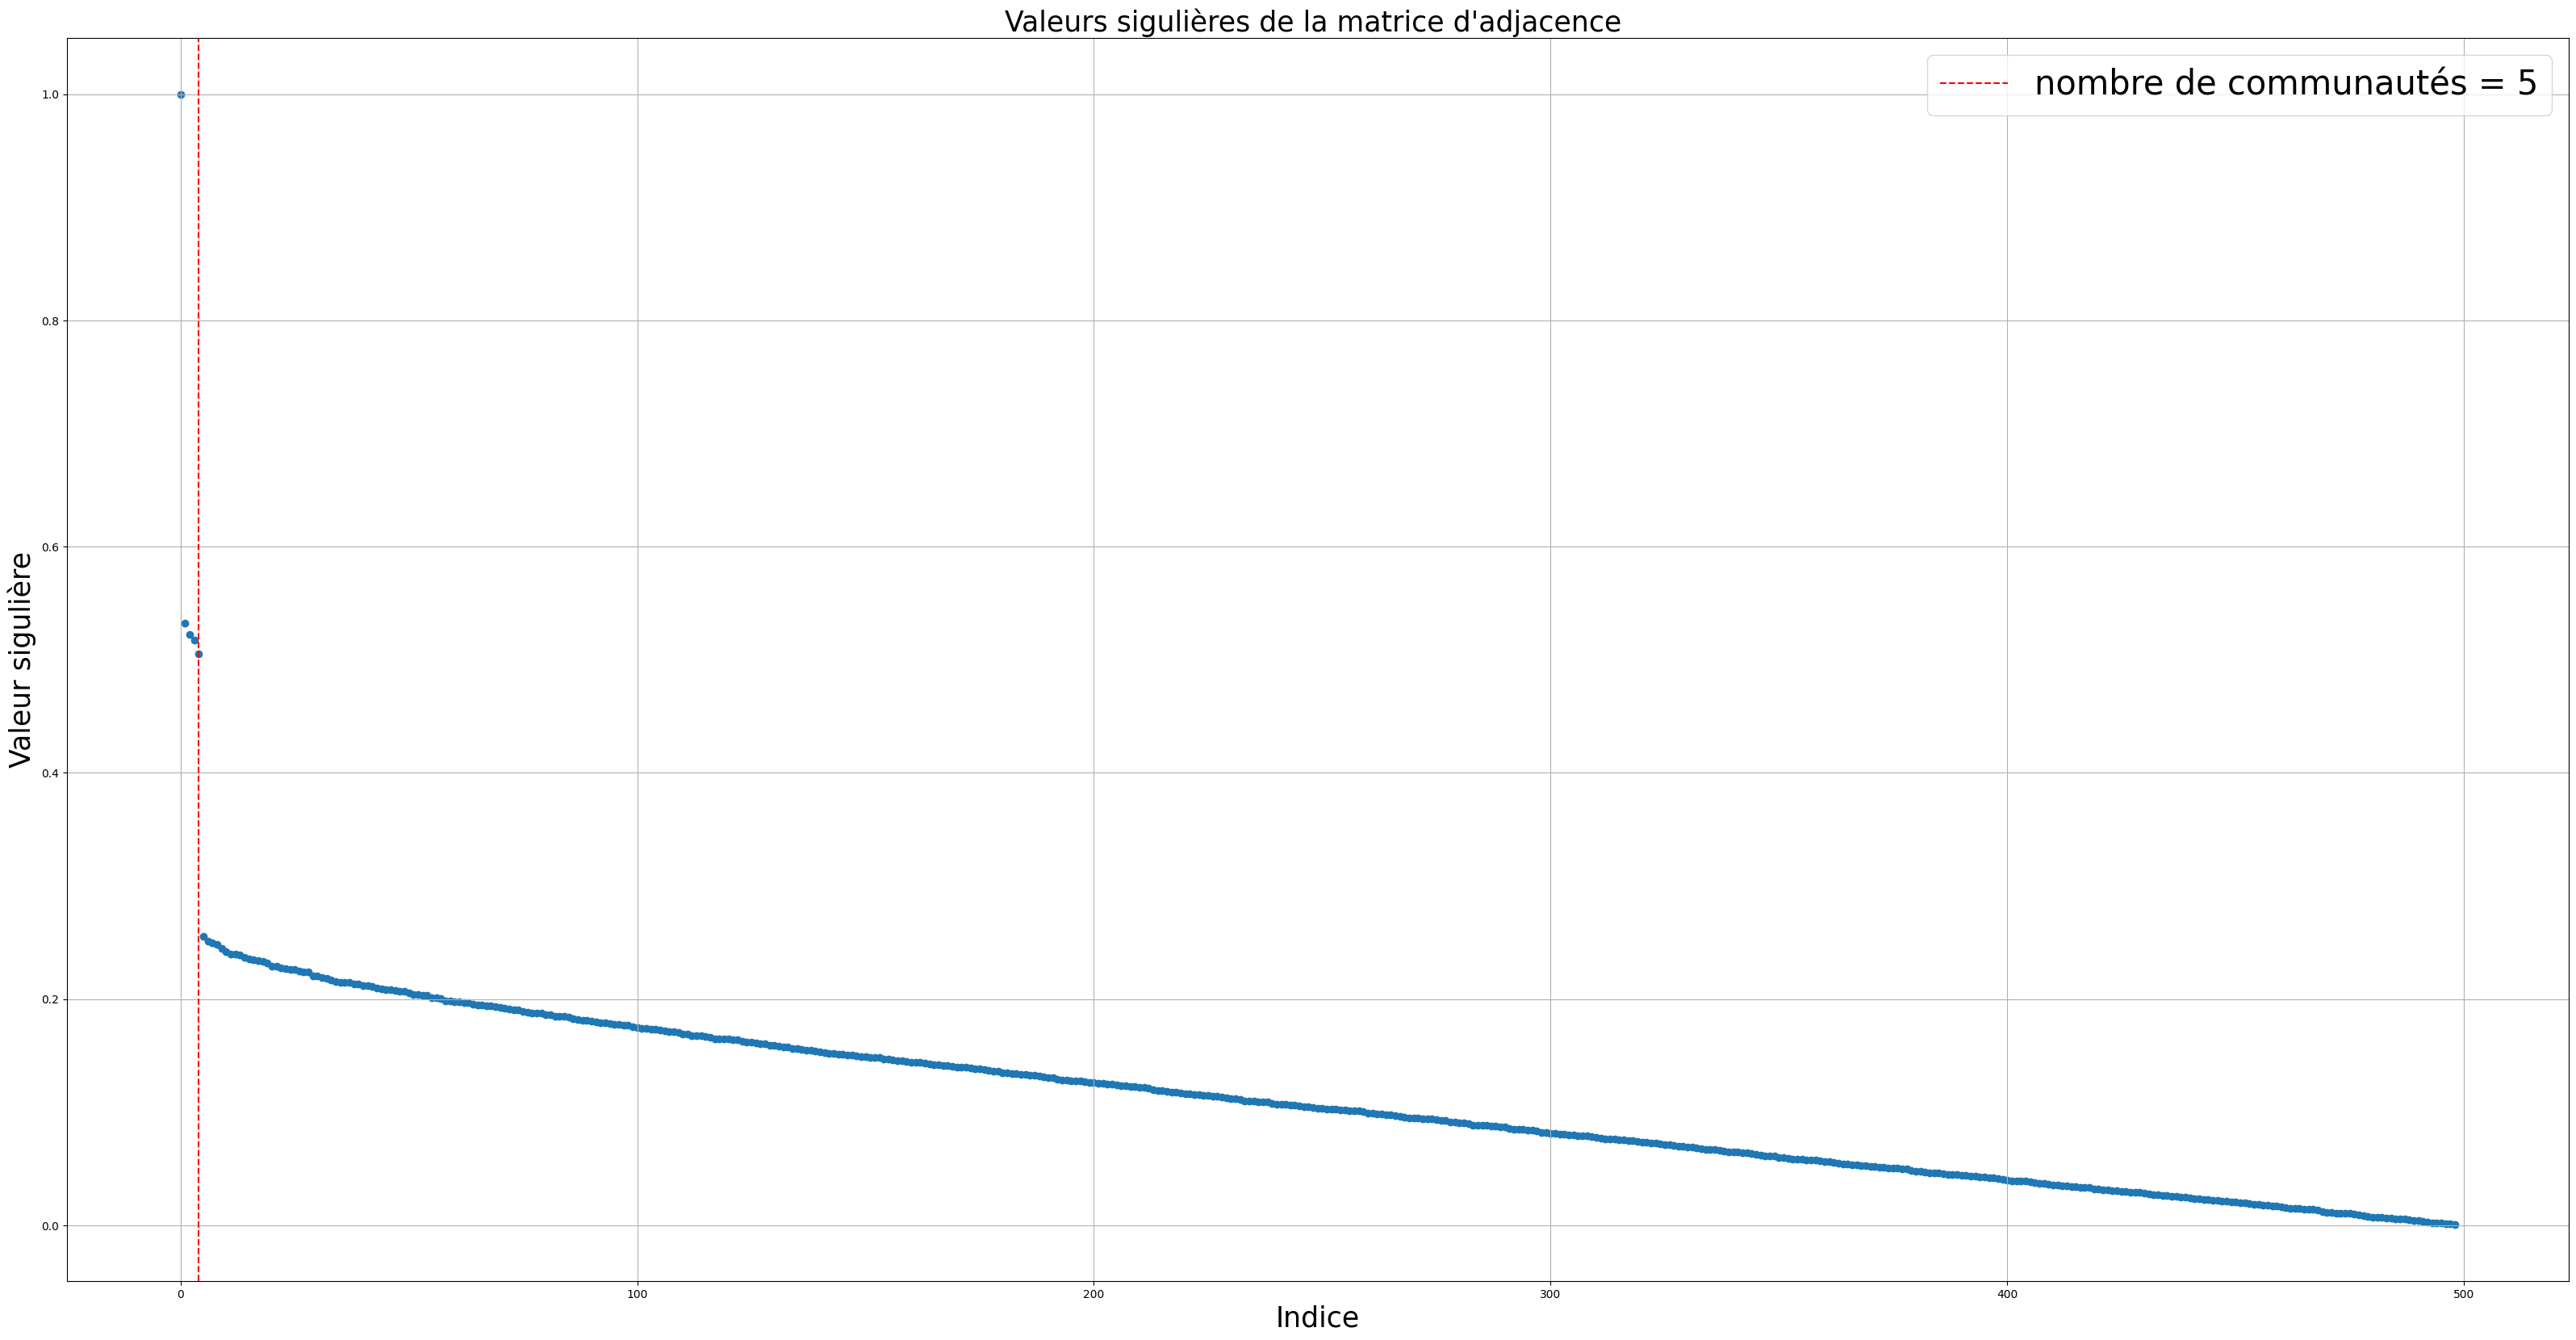

In [17]:
# Degree normalization
degrees = np.sum(A, axis=1)
D_inv_sqrt = np.diag(1.0 / np.sqrt(degrees + 1e-10))  # Avoid division by zero
A_normalized = D_inv_sqrt @ A @ D_inv_sqrt
A=A_normalized

    
# Perform Singular Value Decomposition
n = A.shape[0]
U, S, VT = svds(A, k=n-1 )  # S contains singular values
sorted_singular_values = np.sort(S)[::-1]  # Sort in descending order
    
    # Find the gaps in singular values
gaps = np.diff(sorted_singular_values)
    
# Identify the second largest gap
sorted_gap_indices = np.argsort(np.abs(gaps))[::-1]
second_largest_gap_index = sorted_gap_indices[1]
    
# Optimal number of communities
optimal_k = second_largest_gap_index + 1

plt.figure(figsize=(40, 20))
plt.scatter(range(len(sorted_singular_values)),sorted_singular_values , marker='o')
plt.axvline(second_largest_gap_index, color='r', linestyle='--', label=f'nombre de communautés = {optimal_k}')
plt.title("Valeurs sigulières de la matrice d'adjacence ",fontsize=25)
plt.xlabel("Indice", fontsize=25)
plt.ylabel("Valeur sigulière", fontsize=25)
plt.legend(fontsize=30)
plt.grid()
plt.show()

### Méthode spectrale (matrice hessienne de Bethe)

/var/folders/gp/mjd24qcx5yz_0yn2p3wsmvmh0000gn/T/ipykernel_1667/2919391686.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=30)


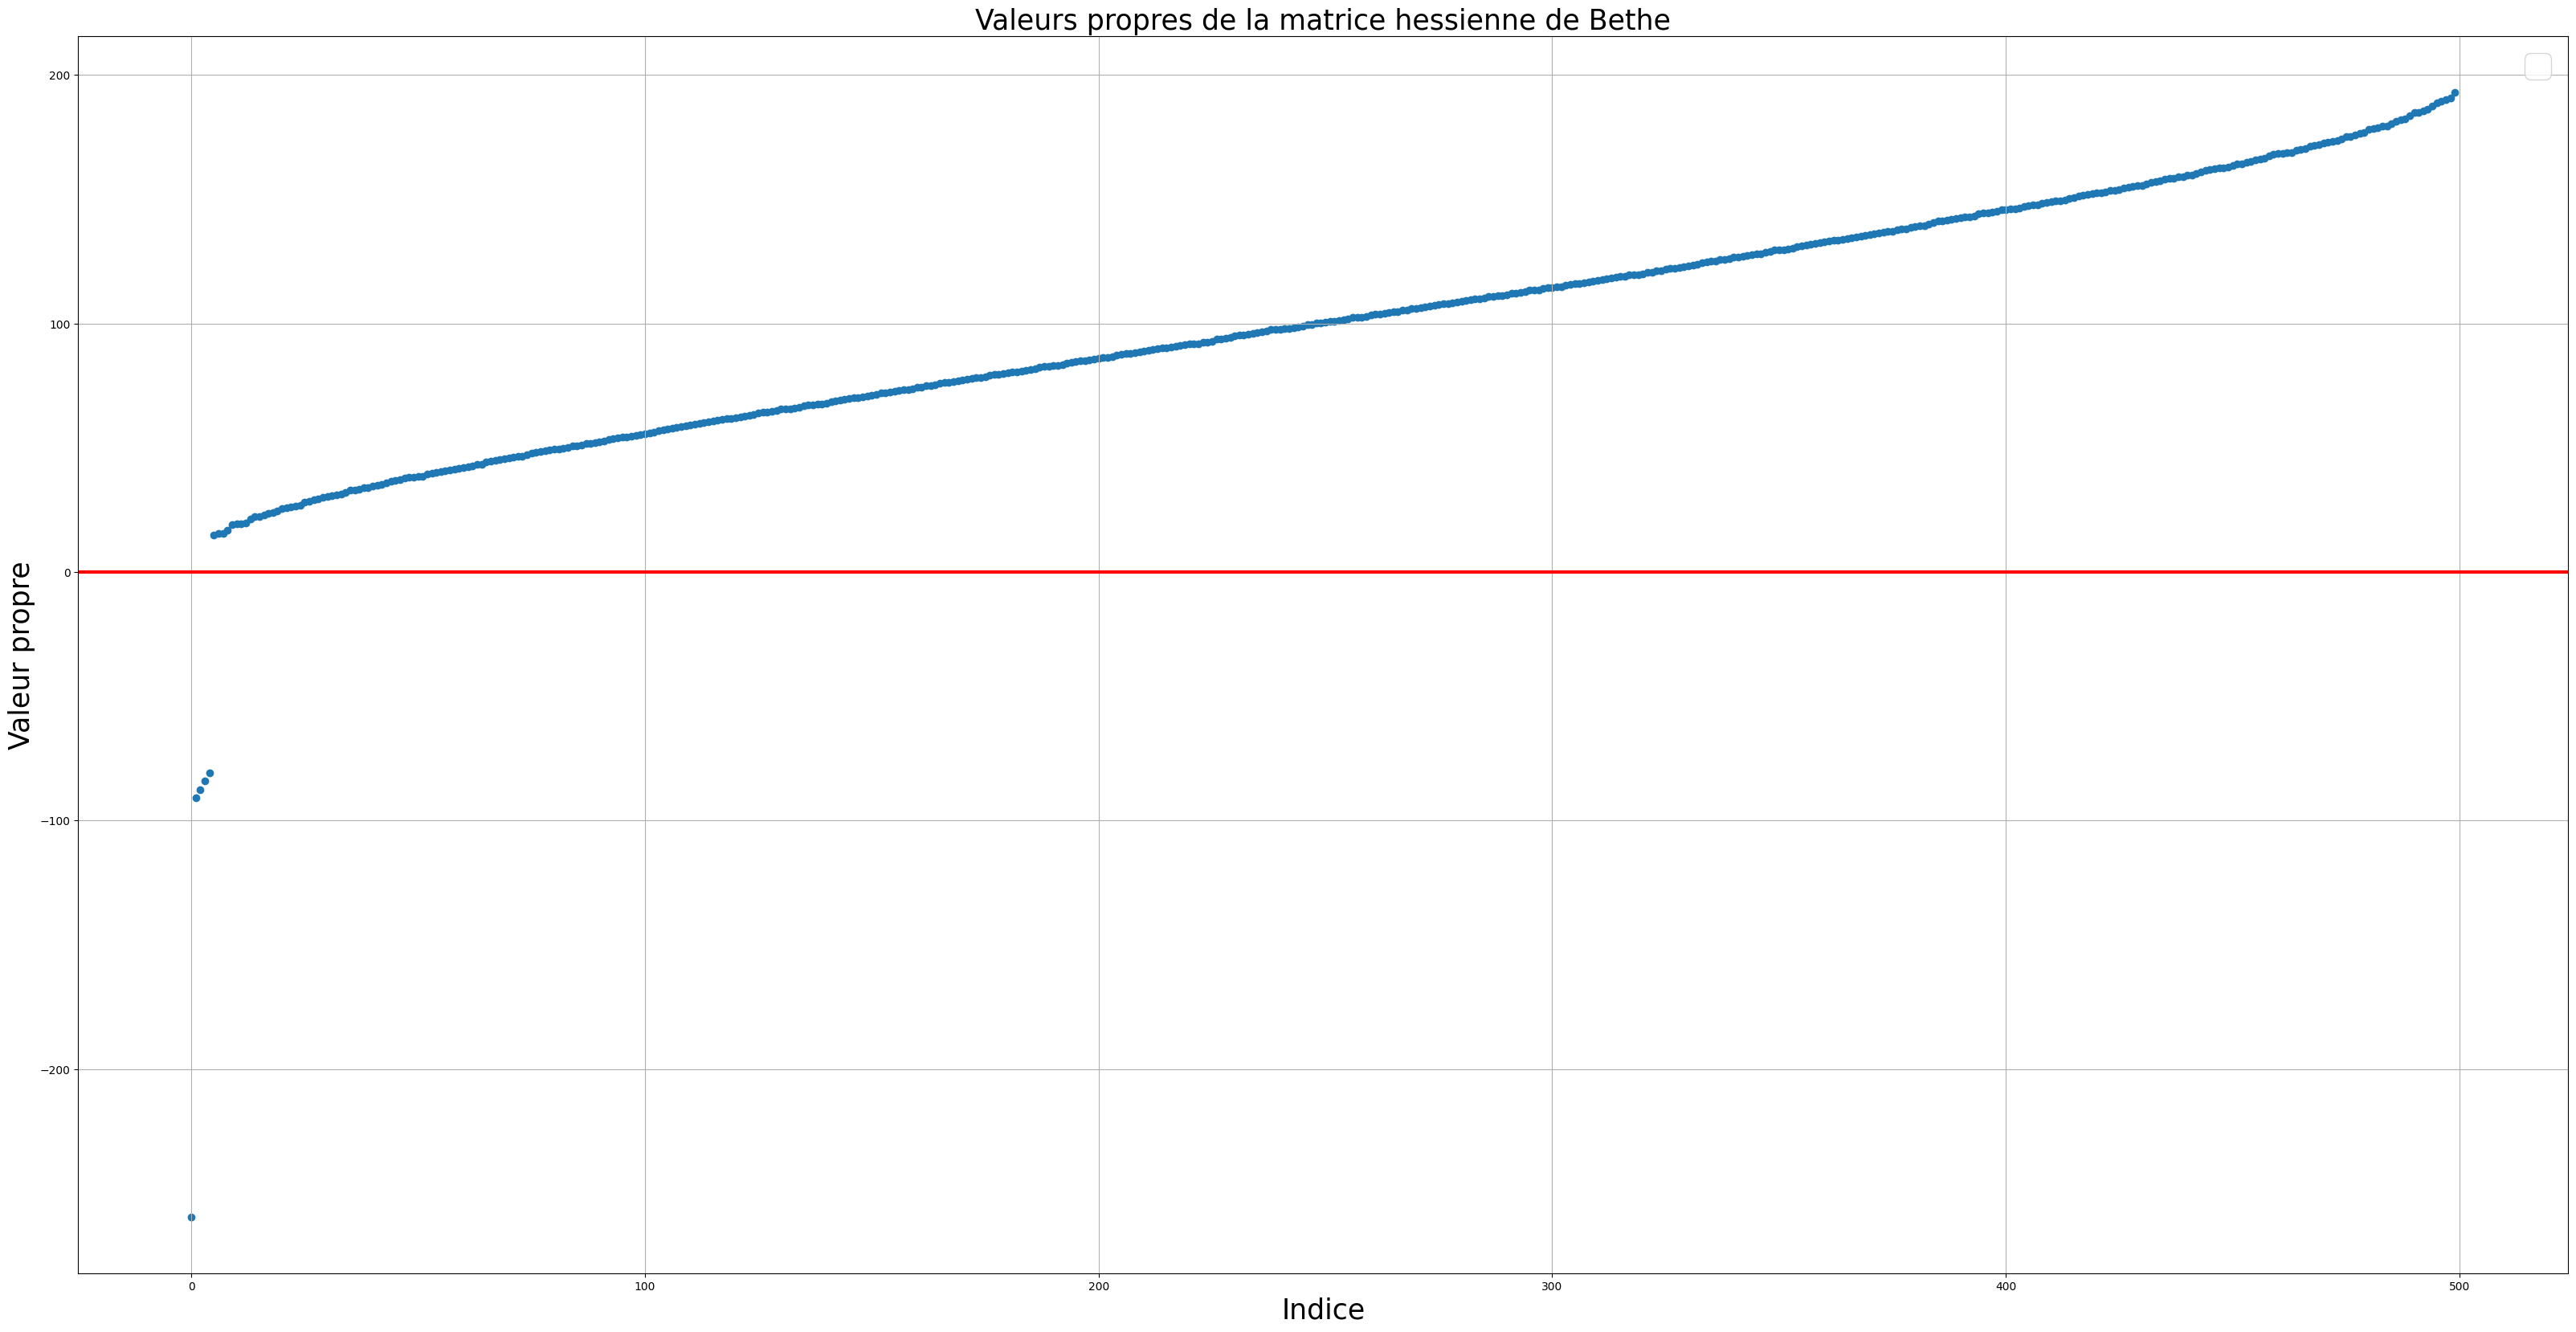

In [20]:
n = A.shape[0]
D = np.diag(np.sum(A,axis=1))
r = 2* G.number_of_edges()
r = np.sqrt(r/n)
H = (r**2 -1)*np.eye(n) - r*A + D
H_eigenvalues = np.linalg.eig(H)[0]
H_eigenvalues = np.sort(H_eigenvalues)
predicted_k=0
for eig in H_eigenvalues:
    if eig<0:
        predicted_k+=1
plt.figure(figsize=(40, 20))
plt.scatter(range(len(H_eigenvalues)),H_eigenvalues , marker='o')
plt.axhline(y=0, color='red', linewidth=3)
plt.title("Valeurs propres de la matrice hessienne de Bethe",fontsize=25)
plt.xlabel("Indice", fontsize=25)
plt.ylabel("Valeur propre", fontsize=25)
plt.legend(fontsize=30)
plt.grid()
plt.show()

## Graphe non équilibré

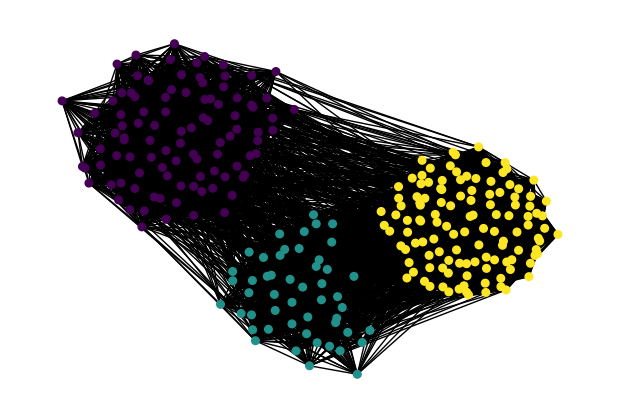

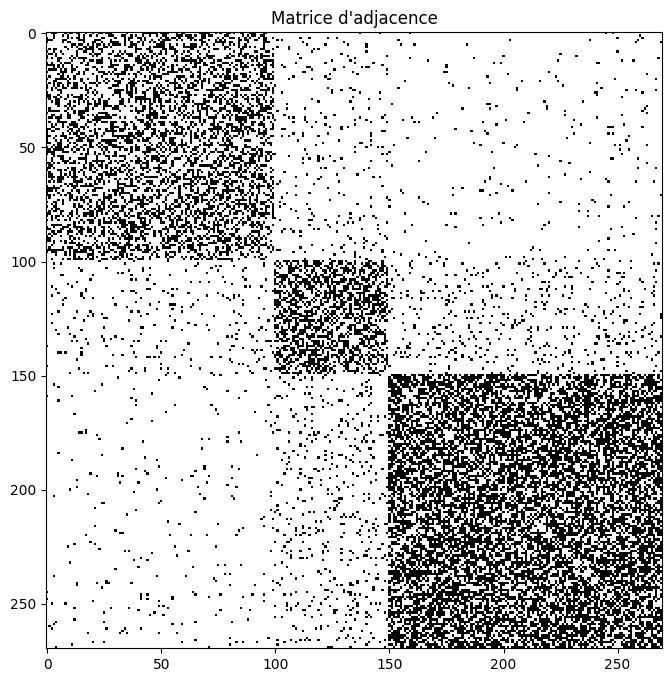

In [22]:
n = [100, 50, 120]
p = [[0.4, 0.05, 0.02],
    [0.05, 0.5, 0.08],
    [0.02, 0.08, 0.6],]
G = nx.stochastic_block_model(n, p, seed=42)
pos = nx.spring_layout(G)  # Disposition des nœuds
plt.figure(figsize=(6, 4))
nx.draw( G, pos, with_labels=False, node_size=30, node_color=[d['block'] for _, d in G.nodes(data=True)])
plt.show()
adj_matrix = nx.adjacency_matrix(G)
adj_matrix_dense = adj_matrix.todense()
plt.figure(figsize=(8, 8))
plt.imshow(adj_matrix_dense, cmap="Greys", interpolation="none")
plt.title("Matrice d'adjacence")
plt.show()

### Méthode spectrale (matrice laplacienne)

/var/folders/gp/mjd24qcx5yz_0yn2p3wsmvmh0000gn/T/ipykernel_1667/415477635.py:4: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eigenvalues, eigenvectors = eigsh(L, k= A.shape[0], which='SM')


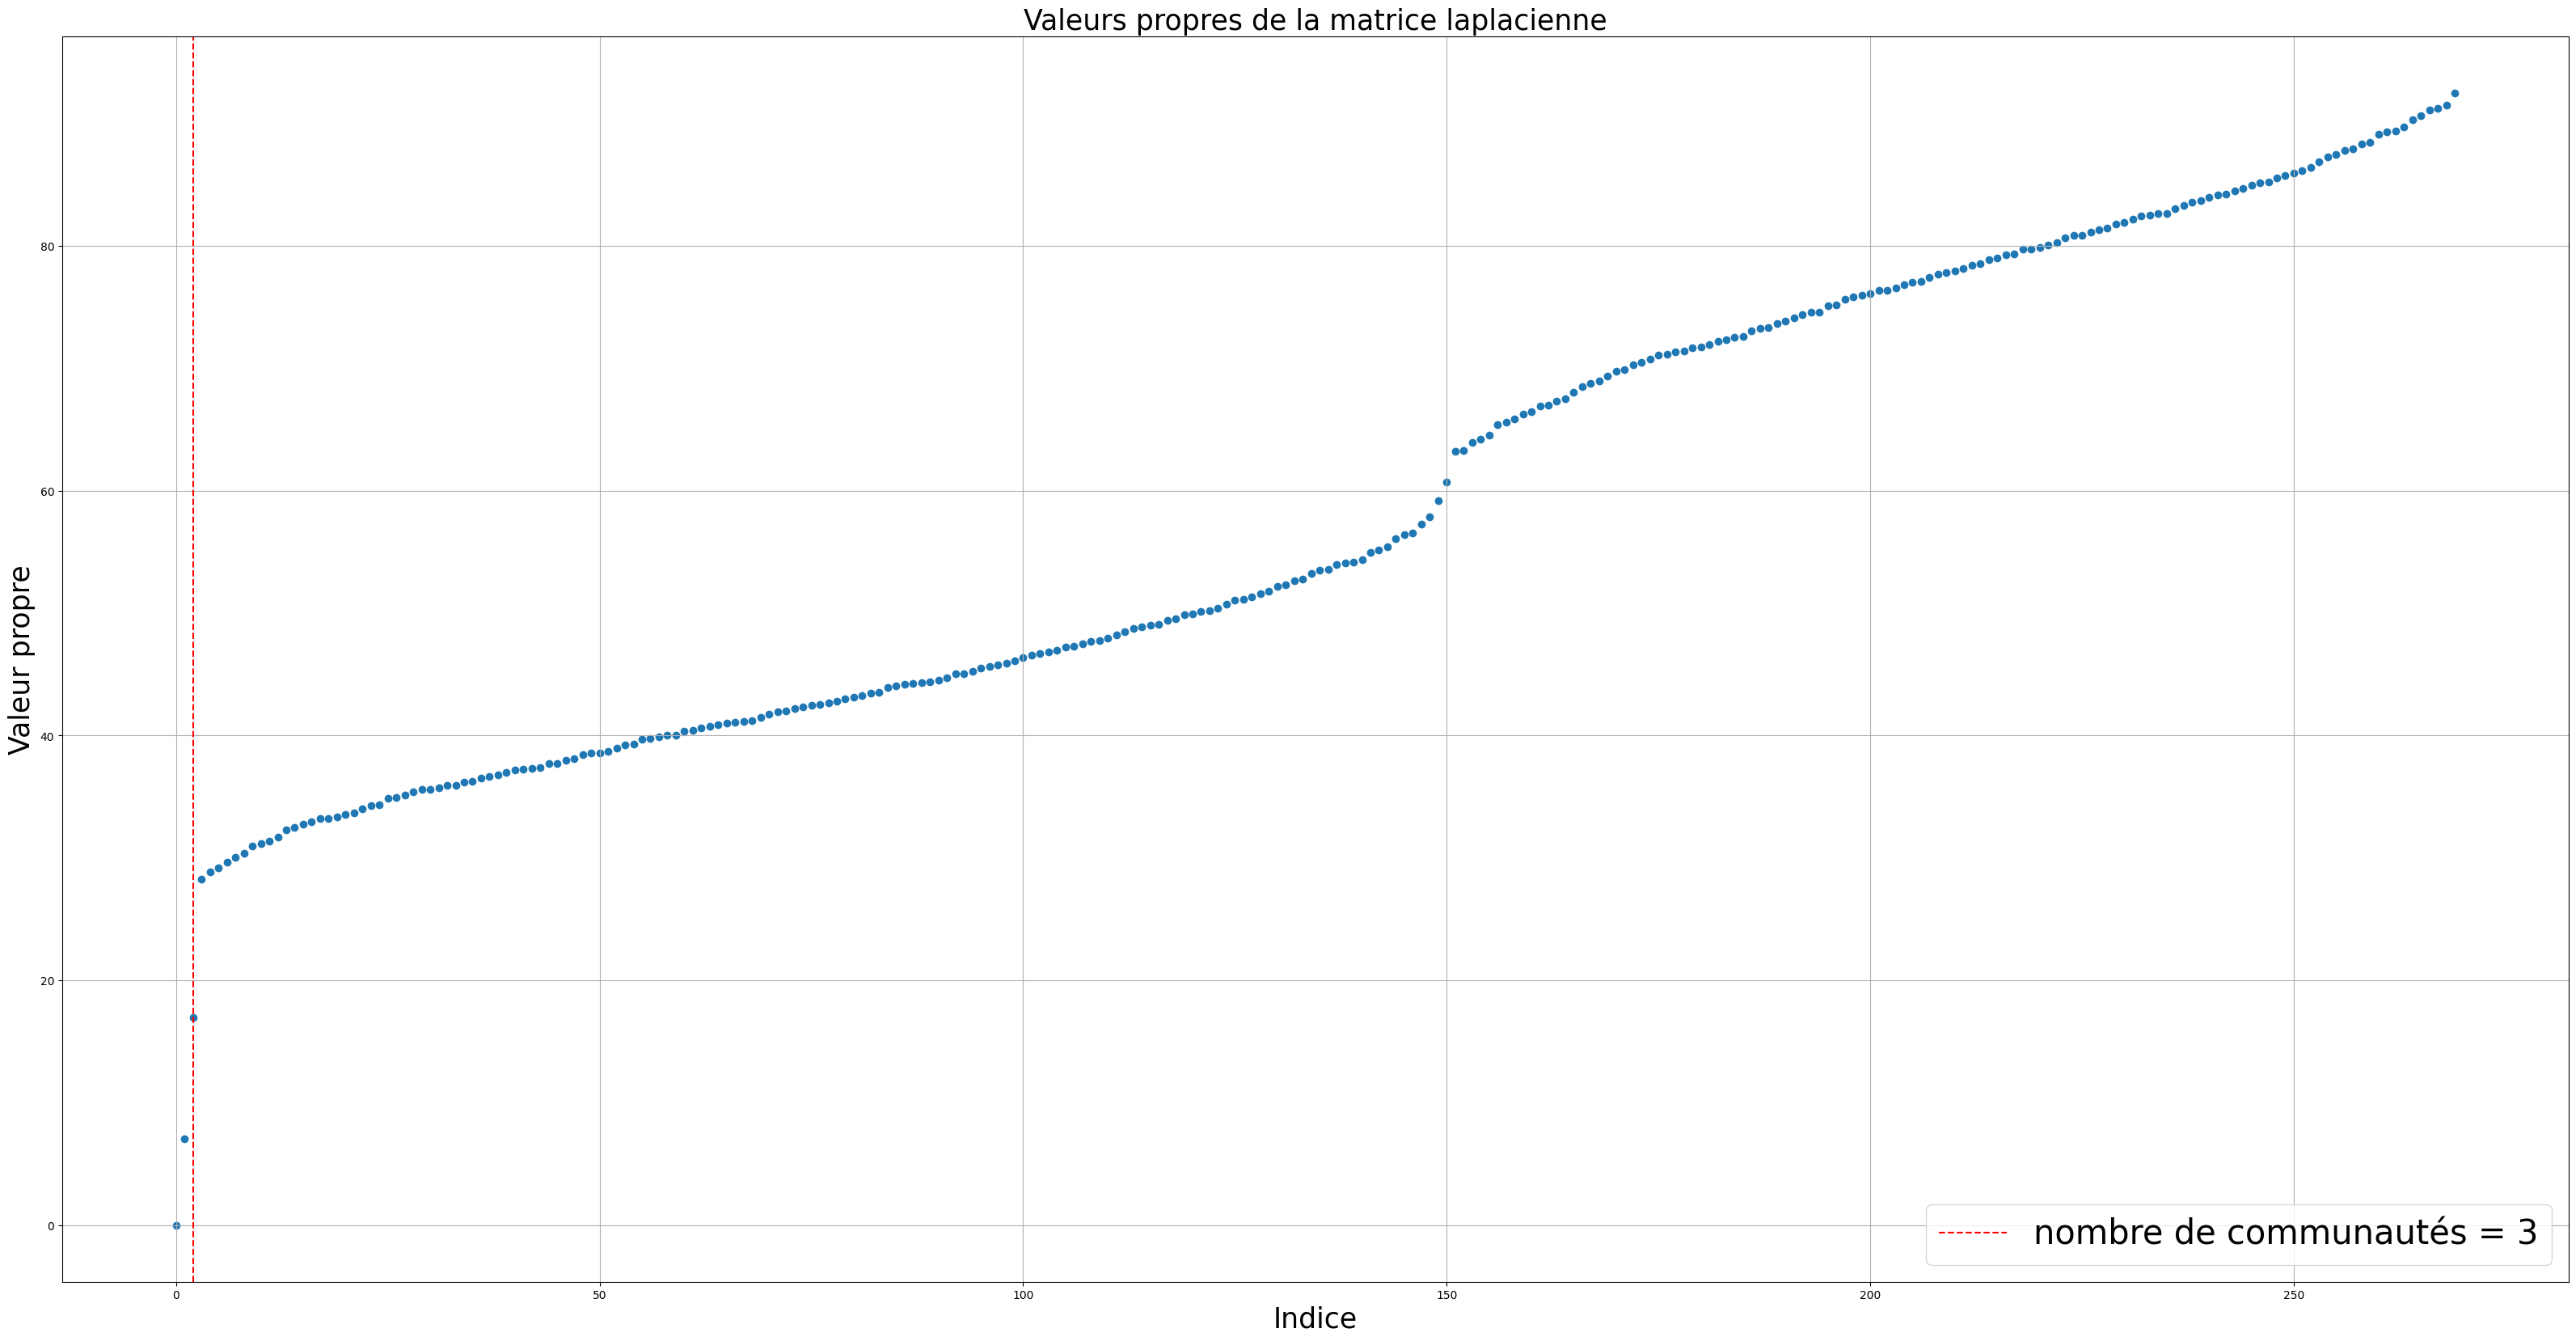

In [23]:
A = nx.adjacency_matrix(G) #matice d'adjacence 
D=np.diag(np.sum(A,axis=1)) #matrice de degrès
L = D - A #matrice laplacienne 
eigenvalues, eigenvectors = eigsh(L, k= A.shape[0], which='SM')
eigenvalues = np.sort(eigenvalues)
spectral_gaps = np.diff(eigenvalues)
largest_gap_index = np.argmax(spectral_gaps)
k = largest_gap_index + 1
plt.figure(figsize=(40, 20))
plt.scatter(range(len(eigenvalues)),eigenvalues , marker='o')
plt.axvline(largest_gap_index, color='r', linestyle='--', label=f'nombre de communautés = {k}')
plt.title("Valeurs propres de la matrice laplacienne",fontsize=25)
plt.xlabel("Indice", fontsize=25)
plt.ylabel("Valeur propre", fontsize=25)
plt.legend(fontsize=30)
plt.grid()
plt.show()

### Méthode spectrale (valeurs singulières matrice d'adjacence)

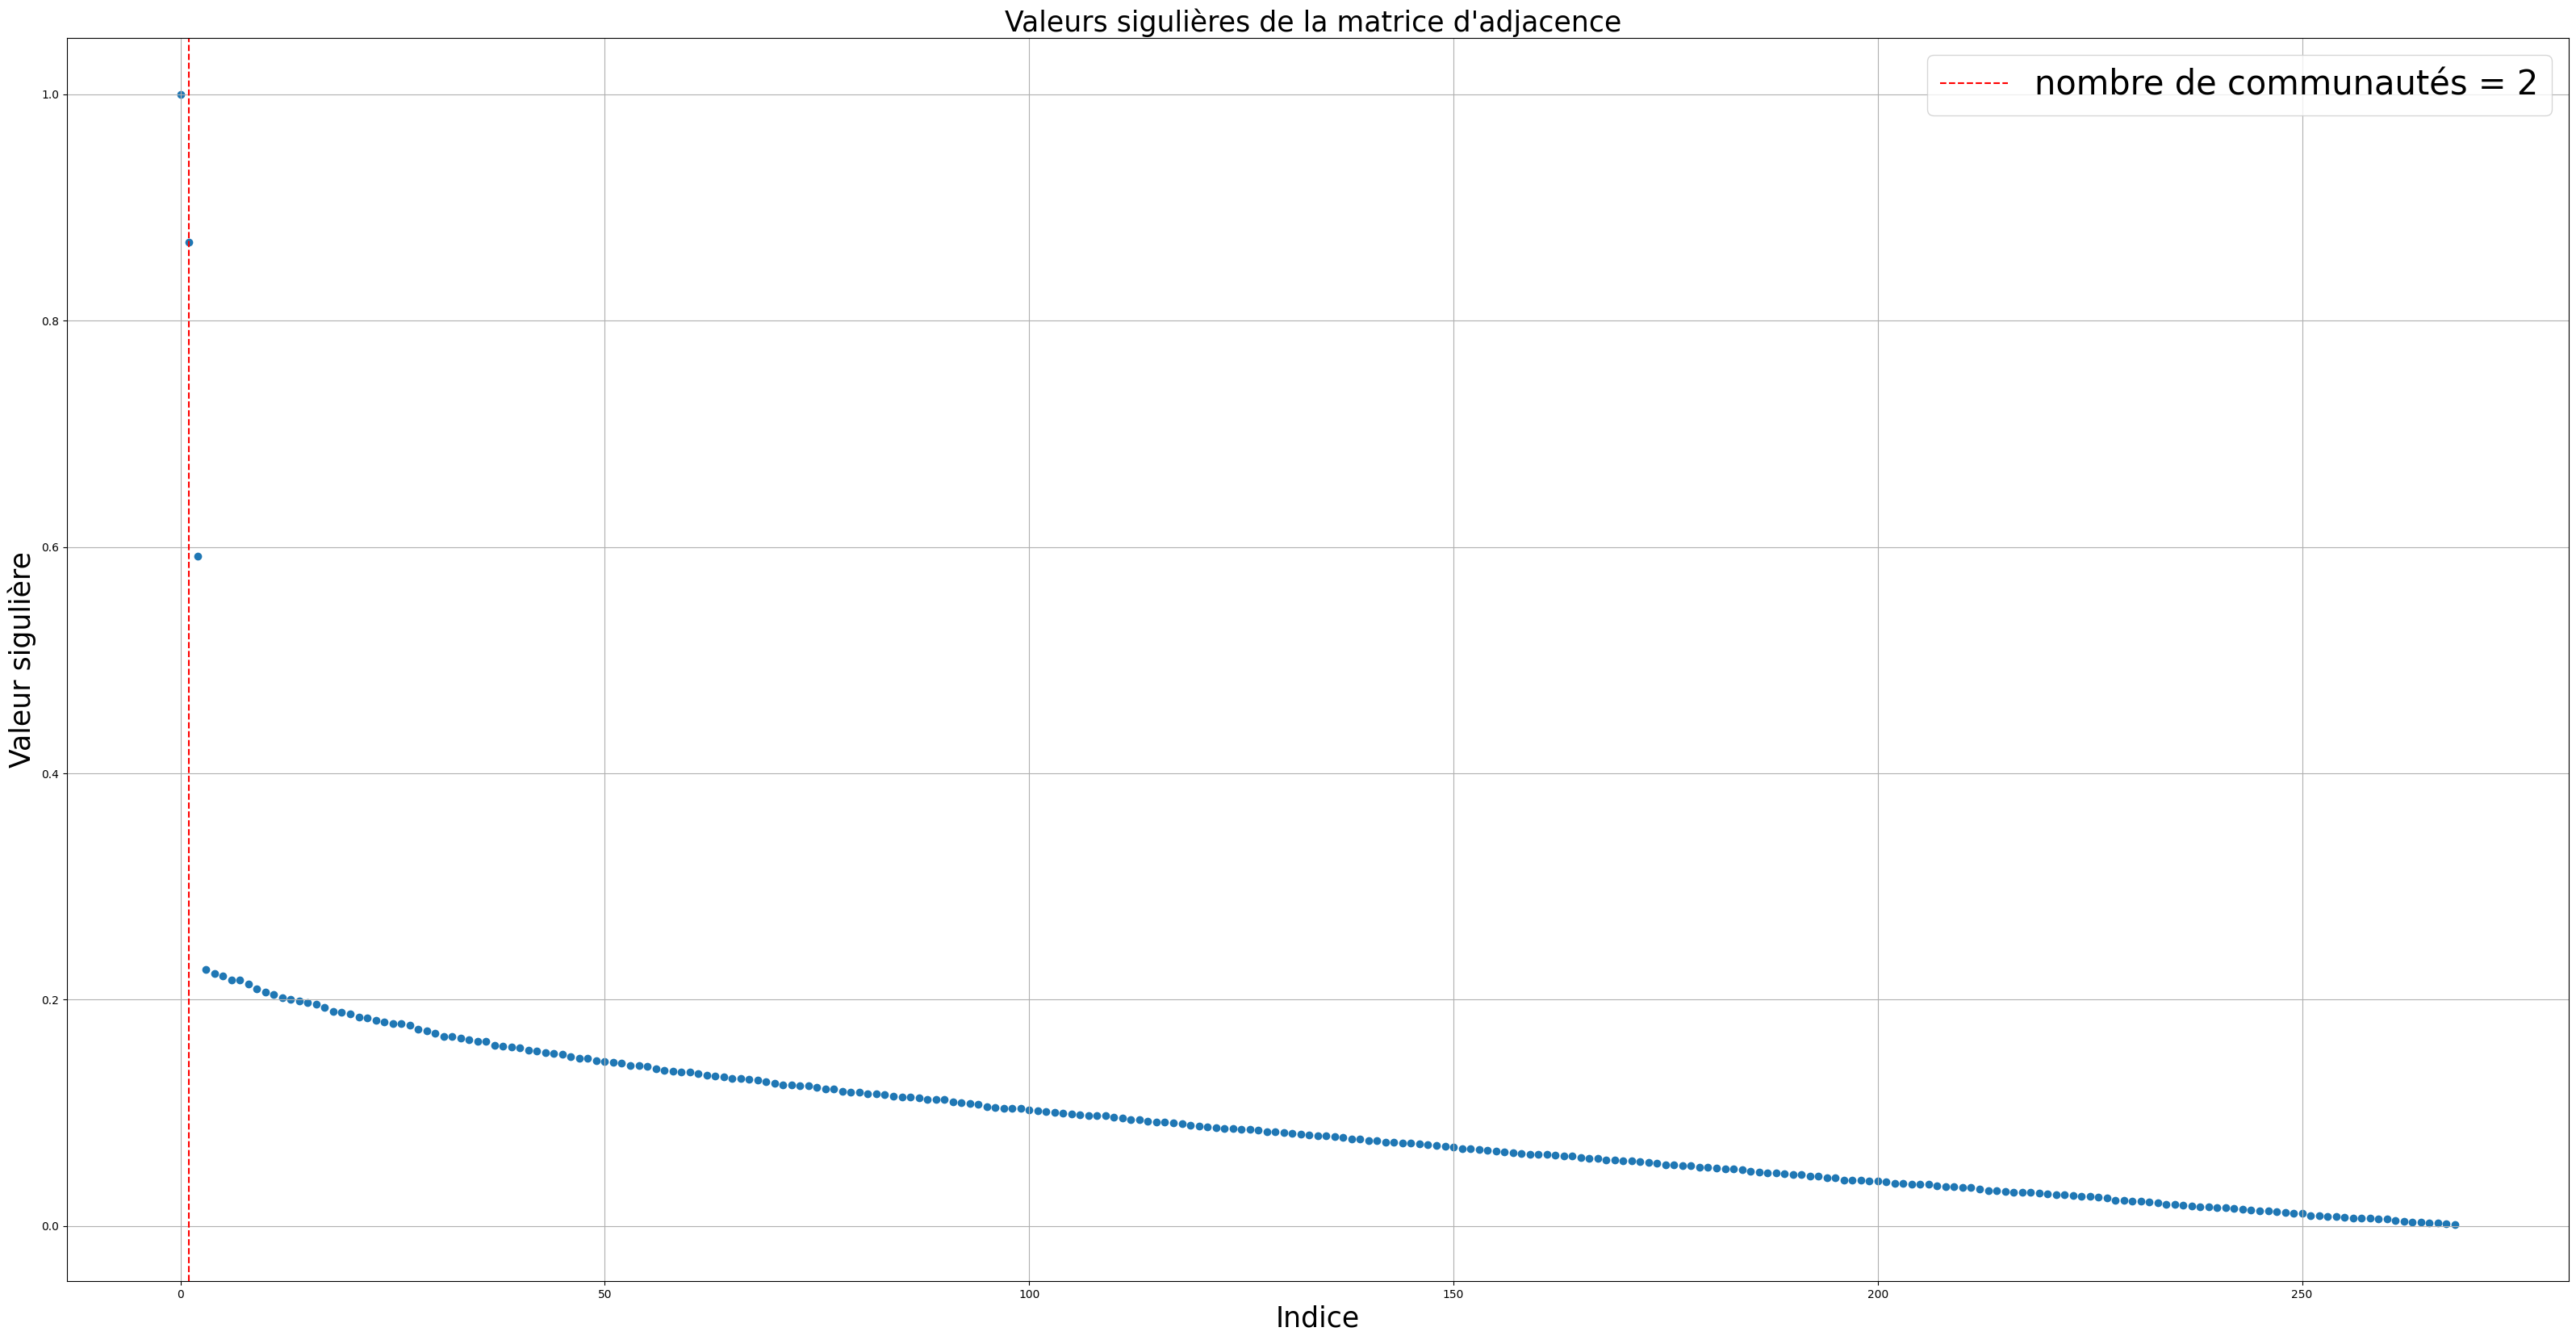

In [26]:
# Degree normalization
degrees = np.sum(A, axis=1)
D_inv_sqrt = np.diag(1.0 / np.sqrt(degrees + 1e-10))  # Avoid division by zero
A_normalized = D_inv_sqrt @ A @ D_inv_sqrt
A=A_normalized

    
# Perform Singular Value Decomposition
n = A.shape[0]
U, S, VT = svds(A, k=n-1 )  # S contains singular values
sorted_singular_values = np.sort(S)[::-1]  # Sort in descending order
    
    # Find the gaps in singular values
gaps = np.diff(sorted_singular_values)
    
# Identify the second largest gap
sorted_gap_indices = np.argsort(np.abs(gaps))[::-1]
second_largest_gap_index = sorted_gap_indices[1]
    
# Optimal number of communities
optimal_k = second_largest_gap_index + 1

plt.figure(figsize=(40, 20))
plt.scatter(range(len(sorted_singular_values)),sorted_singular_values , marker='o')
plt.axvline(second_largest_gap_index, color='r', linestyle='--', label=f'nombre de communautés = {optimal_k}')
plt.title("Valeurs sigulières de la matrice d'adjacence ",fontsize=25)
plt.xlabel("Indice", fontsize=25)
plt.ylabel("Valeur sigulière", fontsize=25)
plt.legend(fontsize=30)
plt.grid()
plt.show()

### Méthode spectrale (matrice hessienne de Bethe)

/var/folders/gp/mjd24qcx5yz_0yn2p3wsmvmh0000gn/T/ipykernel_1667/2919391686.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=30)


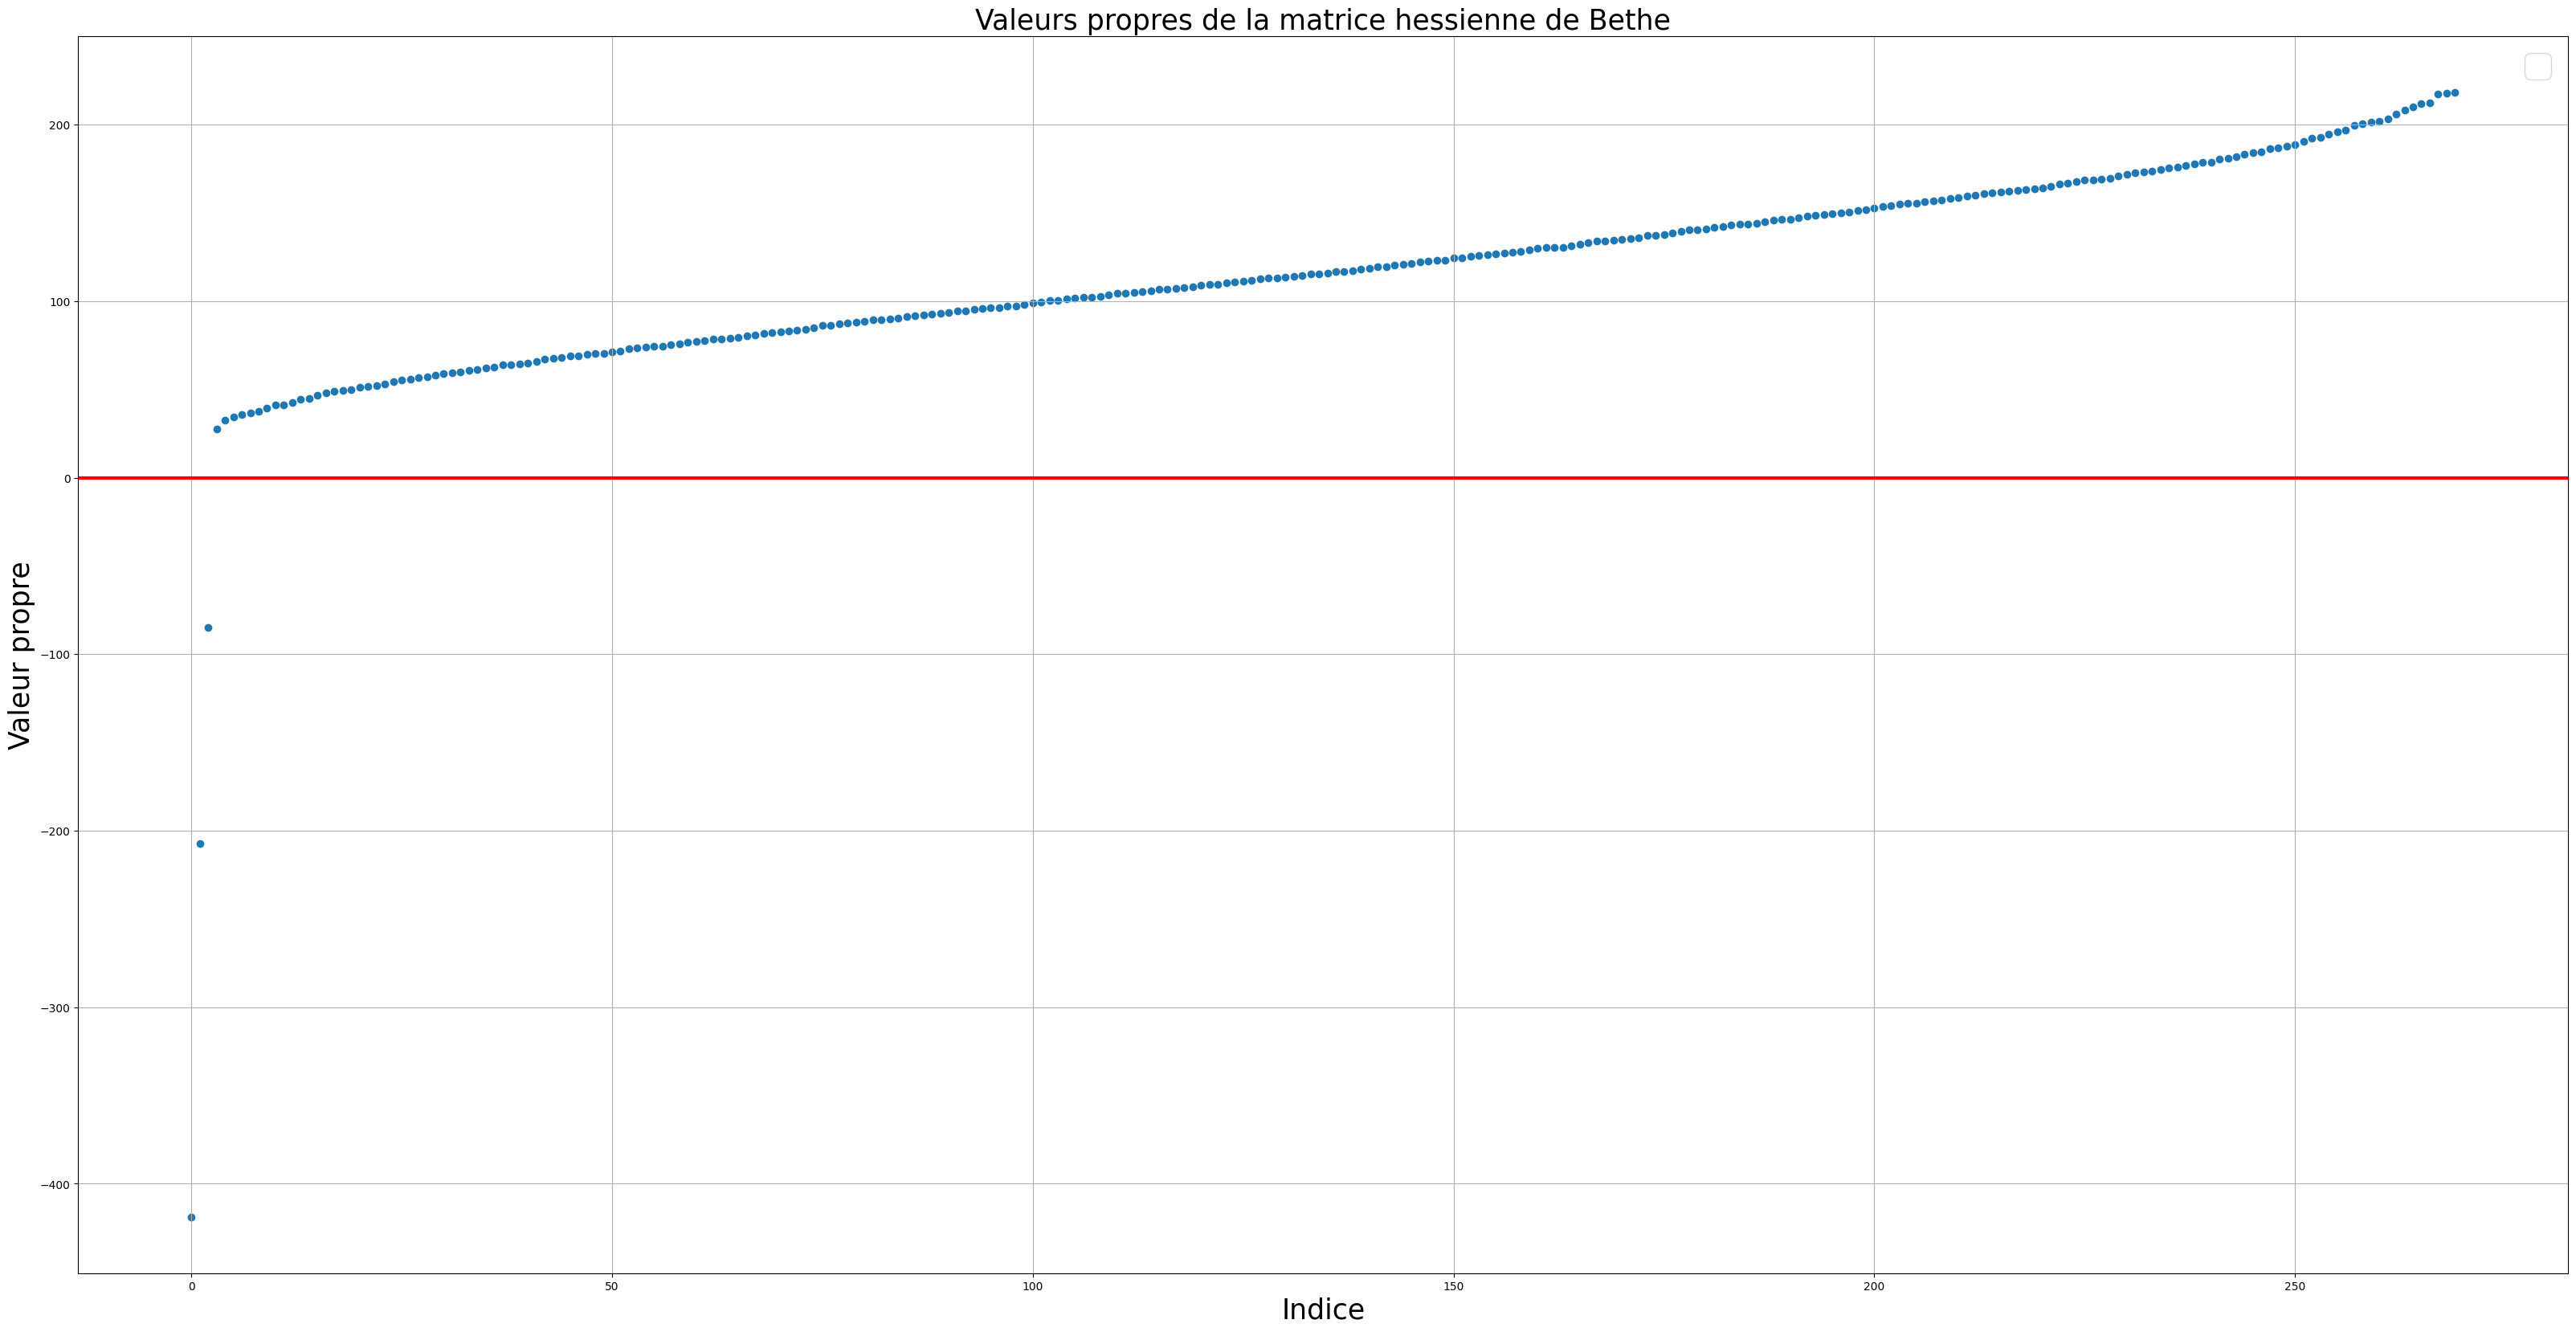

In [25]:
n = A.shape[0]
D = np.diag(np.sum(A,axis=1))
r = 2* G.number_of_edges()
r = np.sqrt(r/n)
H = (r**2 -1)*np.eye(n) - r*A + D
H_eigenvalues = np.linalg.eig(H)[0]
H_eigenvalues = np.sort(H_eigenvalues)
predicted_k=0
for eig in H_eigenvalues:
    if eig<0:
        predicted_k+=1
plt.figure(figsize=(40, 20))
plt.scatter(range(len(H_eigenvalues)),H_eigenvalues , marker='o')
plt.axhline(y=0, color='red', linewidth=3)
plt.title("Valeurs propres de la matrice hessienne de Bethe",fontsize=25)
plt.xlabel("Indice", fontsize=25)
plt.ylabel("Valeur propre", fontsize=25)
plt.legend(fontsize=30)
plt.grid()
plt.show()